# RETWEET Prediction

# This model predicts the total number of retweets of a tweet 

In [4]:
#Load the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
sns.set()

# Load the data

In [227]:
#Load the raw data

raw_data = pd.read_excel("C:/bala EHF/tweets.xlsx")

#Explore the data
raw_data.head()

TweetPostedTime             TweetID  \
0  Tue Dec 20 10:57:00 +0000 2016  811163485052817408   
1  Tue Dec 20 10:56:59 +0000 2016  811163483463122944   
2  Tue Dec 20 10:56:55 +0000 2016  811163466387988480   
3  Tue Dec 20 10:56:55 +0000 2016  811163465125679104   
4  Tue Dec 20 10:56:53 +0000 2016  811163457508642817   

                                           TweetBody  TweetRetweetFlag  \
0  RT @BeachyMaldives: Local interaction is a gre...              True   
1  RT @TechTerraEd: Need #giftideas for your kid(...              True   
2  Seven Questions Before Choosing a Cruise Line ...             False   
3  RT @CMGsportsclub: Yoga do Brasil, un havre de...              True   
4  RT @StylishRentals: Love this! "Palm Springs M...              True   

                                         TweetSource  TweetInReplyToStatusID  \
0  <a href="http://twitter.com/download/iphone" r...                     NaN   
1  <a href="http://twitter.com/download/iphone" r...                     NaN   
2  <a href="http://www.google.com/" rel="nofollow...                     NaN   
3  <a href="https://roundteam.co" rel="nofollow">...                     NaN   
4  <a href="http://twitter.com" rel="nofollow">Tw...                     NaN   

   TweetInReplyToUserID TweetInReplyToScreenName  TweetRetweetCount  \
0                   NaN                      NaN                  1   
1                   NaN                      NaN                  1   
2                   NaN                      NaN                  0   
3                   NaN                      NaN                  1   
4                   NaN                      NaN               3065   

   TweetFavoritesCount  ...  \
0                    0  ...   
1                    0  ...   
2                    0  ...   
3                    0  ...   
4                    0  ...   

                                     UserDescription                 UserLink  \
0  Pls donate 2 https://t.co/RvOUK9lAWI #YearEndG...  https://t.co/jghZVBsiQF   
1  Educator of students with special needs, Mothe...                      NaN   
2  Thrifty Mom Media social media consulting and ...  https://t.co/cEhGzaQJp6   
3  Adventure travel, yoga, paleo, Crossfit, runni...  https://t.co/3IHwXkgAkA   
4  I really have got giant ambitions. I start com...                      NaN   

                    UserExpandedLink UserFollowersCount UserFriendsCount  \
0          http://cjqenterprises.com               6334             6144   
1                                NaN                154              371   
2  http://www.thriftymommastips.com/              23433            24762   
3        https://primalsanctuary.com              11136            10081   
4                                NaN                 55               21   

  UserListedCount                  UserSignupDate  UserTweetCount  \
0            1917  Sun Jun 14 22:36:15 +0000 2015           33556   
1             180  Sat Jan 02 13:36:23 +0000 2010            3201   
2             961  Tue May 26 21:26:09 +0000 2009          147958   
3             978  Sat Sep 12 20:29:18 +0000 2015           28988   
4              31  Wed Sep 07 16:22:15 +0000 2016           19581   

   MacroIterationNumber tweet.place  
0                     0         NaN  
1                     0         NaN  
2                     0         NaN  
3                     0         NaN  
4                     0         NaN  

[5 rows x 32 columns]

# Pre Processing

In [228]:
# Describe the dataset to understand the data, count, data type

raw_data.info()

raw_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42368 entries, 0 to 42367
Data columns (total 32 columns):
TweetPostedTime              42368 non-null object
TweetID                      42368 non-null int64
TweetBody                    42368 non-null object
TweetRetweetFlag             42368 non-null bool
TweetSource                  42368 non-null object
TweetInReplyToStatusID       101 non-null float64
TweetInReplyToUserID         189 non-null float64
TweetInReplyToScreenName     189 non-null object
TweetRetweetCount            42368 non-null int64
TweetFavoritesCount          42368 non-null int64
TweetHashtags                42268 non-null object
TweetPlaceID                 1000 non-null object
TweetPlaceName               1000 non-null object
TweetPlaceFullName           1000 non-null object
TweetCountry                 999 non-null object
TweetPlaceBoundingBox        1000 non-null object
TweetPlaceAttributes         0 non-null float64
TweetPlaceContainedWithin    0 non-null fl

TweetID  TweetInReplyToStatusID  TweetInReplyToUserID  \
count  4.236800e+04            1.010000e+02          1.890000e+02   
mean   8.110767e+17            8.107005e+17          6.489163e+16   
std    4.408380e+13            2.581401e+15          2.140714e+17   
min    8.110045e+17            7.860072e+17          3.389391e+06   
25%    8.110410e+17            8.110171e+17          7.271373e+07   
50%    8.110762e+17            8.110663e+17          3.664521e+08   
75%    8.111137e+17            8.111160e+17          2.615368e+09   
max    8.111635e+17            8.111578e+17          8.016277e+17   

       TweetRetweetCount  TweetFavoritesCount  TweetPlaceAttributes  \
count       42368.000000         42368.000000                   0.0   
mean         1081.095402             0.805561                   NaN   
std          1432.473561            37.214059                   NaN   
min             0.000000             0.000000                   NaN   
25%             0.000000             0.000000                   NaN   
50%            14.000000             0.000000                   NaN   
75%          3069.000000             0.000000                   NaN   
max          4056.000000          2813.000000                   NaN   

       TweetPlaceContainedWithin        UserID  UserFollowersCount  \
count                        0.0  4.236800e+04        4.236800e+04   
mean                         NaN  3.398540e+17        6.196995e+03   
std                          NaN  3.799438e+17        5.620006e+04   
min                          NaN  1.968000e+03        0.000000e+00   
25%                          NaN  5.862261e+08        4.000000e+01   
50%                          NaN  4.610624e+09        1.490000e+02   
75%                          NaN  7.662723e+17        1.819250e+03   
max                          NaN  8.111532e+17        4.572706e+06   

       UserFriendsCount  UserListedCount  UserTweetCount  MacroIterationNumber  
count      42368.000000     42368.000000    4.236800e+04          42368.000000  
mean        3859.351846       312.092546    3.777249e+04            226.111688  
std        19345.980461       850.623581    9.001777e+04            128.720271  
min            0.000000         0.000000    1.000000e+00              0.000000  
25%           40.000000        17.000000    2.793500e+03            115.000000  
50%          304.000000        41.000000    1.989700e+04            227.000000  
75%         1780.000000       217.000000    3.327400e+04            337.000000  
max       689302.000000     26577.000000    2.064424e+06            449.000000

In [229]:
# Based on the summary of numerical columns & info, the below columns are dropped from thh dataset because of either less number of records or no records

Cols_to_be_removed_Set1 = ["TweetInReplyToStatusID","TweetInReplyToUserID","TweetPlaceAttributes","TweetPlaceContainedWithin","TweetInReplyToScreenName",
                          "TweetPlaceID","TweetPlaceName","TweetPlaceFullName","TweetCountry","TweetPlaceBoundingBox","UserLink","UserExpandedLink",
                          "tweet.place"]
raw_data_mod_1 = raw_data.drop(Cols_to_be_removed_Set1,axis=1)

In [230]:
raw_data_mod_1.describe()
raw_data_mod_1.describe(include="all") # describe categorical columns also

TweetPostedTime       TweetID  \
count                            42368  4.236800e+04   
unique                           19842           NaN   
top     Tue Dec 20 08:17:03 +0000 2016           NaN   
freq                               113           NaN   
mean                               NaN  8.110767e+17   
std                                NaN  4.408380e+13   
min                                NaN  8.110045e+17   
25%                                NaN  8.110410e+17   
50%                                NaN  8.110762e+17   
75%                                NaN  8.111137e+17   
max                                NaN  8.111635e+17   

                                                TweetBody TweetRetweetFlag  \
count                                               42368            42368   
unique                                              19762                2   
top     RT @StylishRentals: Vacation rental Condo in M...             True   
freq                                                 3231            26862   
mean                                                  NaN              NaN   
std                                                   NaN              NaN   
min                                                   NaN              NaN   
25%                                                   NaN              NaN   
50%                                                   NaN              NaN   
75%                                                   NaN              NaN   
max                                                   NaN              NaN   

                                              TweetSource  TweetRetweetCount  \
count                                               42368       42368.000000   
unique                                                735                NaN   
top     <a href="http://twitter.com" rel="nofollow">Tw...                NaN   
freq                                                19365                NaN   
mean                                                  NaN        1081.095402   
std                                                   NaN        1432.473561   
min                                                   NaN           0.000000   
25%                                                   NaN           0.000000   
50%                                                   NaN          14.000000   
75%                                                   NaN        3069.000000   
max                                                   NaN        4056.000000   

        TweetFavoritesCount TweetHashtags        UserID              UserName  \
count          42368.000000         42268  4.236800e+04                 42368   
unique                  NaN          9652           NaN                 17874   
top                     NaN        travel           NaN  Charles Friedo Frize   
freq                    NaN          7882           NaN                   176   
mean               0.805561           NaN  3.398540e+17                   NaN   
std               37.214059           NaN  3.799438e+17                   NaN   
min                0.000000           NaN  1.968000e+03                   NaN   
25%                0.000000           NaN  5.862261e+08                   NaN   
50%                0.000000           NaN  4.610624e+09                   NaN   
75%                0.000000           NaN  7.662723e+17                   NaN   
max             2813.000000           NaN  8.111532e+17                   NaN   

       UserScreenName   UserLocation  \
count           42368          26342   
unique          19621           6395   
top      ebook_travel  United States   
freq              172           1226   
mean              NaN            NaN   
std               NaN            NaN   
min               NaN            NaN   
25%               NaN            NaN   
50%               NaN            NaN   
75%               NaN            NaN   
max               NaN            NaN   

# Add new feature

In [231]:
# Bassed on the analysis, new feature is derived from categorical variable "Tweetshashtag"
raw_data_mod_1['Hashtag count'] = raw_data_mod_1["TweetHashtags"].apply(lambda x: len(str(x).split(' ')))
raw_data_mod_1

TweetPostedTime             TweetID  \
0      Tue Dec 20 10:57:00 +0000 2016  811163485052817408   
1      Tue Dec 20 10:56:59 +0000 2016  811163483463122944   
2      Tue Dec 20 10:56:55 +0000 2016  811163466387988480   
3      Tue Dec 20 10:56:55 +0000 2016  811163465125679104   
4      Tue Dec 20 10:56:53 +0000 2016  811163457508642817   
...                               ...                 ...   
42363  Tue Dec 20 00:25:13 +0000 2016  811004491378073600   
42364  Tue Dec 20 00:25:12 +0000 2016  811004490300223492   
42365  Tue Dec 20 00:25:12 +0000 2016  811004489813495808   
42366  Tue Dec 20 00:25:12 +0000 2016  811004488932737024   
42367  Tue Dec 20 00:25:12 +0000 2016  811004487737360384   

                                               TweetBody  TweetRetweetFlag  \
0      RT @BeachyMaldives: Local interaction is a gre...              True   
1      RT @TechTerraEd: Need #giftideas for your kid(...              True   
2      Seven Questions Before Choosing a Cruise Line ...             False   
3      RT @CMGsportsclub: Yoga do Brasil, un havre de...              True   
4      RT @StylishRentals: Love this! "Palm Springs M...              True   
...                                                  ...               ...   
42363  #BusinessInsider Your Money #Travel The Bigges...             False   
42364  .@jessicaparsons @brokegirlsdiary #rockstar #D...             False   
42365  RT @StylishRentals: Love this! "Dragonfly Dese...              True   
42366  RT @StylishRentals: Love this! "Dragonfly Dese...              True   
42367  RT @StylishRentals: Love this! "Dragonfly Dese...              True   

                                             TweetSource  TweetRetweetCount  \
0      <a href="http://twitter.com/download/iphone" r...                  1   
1      <a href="http://twitter.com/download/iphone" r...                  1   
2      <a href="http://www.google.com/" rel="nofollow...                  0   
3      <a href="https://roundteam.co" rel="nofollow">...                  1   
4      <a href="http://twitter.com" rel="nofollow">Tw...               3065   
...                                                  ...                ...   
42363  <a href="http://www.hootsuite.com" rel="nofoll...                  0   
42364  <a href="http://www.facebook.com/twitter" rel=...                  0   
42365  <a href="http://twitter.com" rel="nofollow">Tw...               3043   
42366  <a href="http://twitter.com" rel="nofollow">Tw...               3043   
42367  <a href="http://twitter.com" rel="nofollow">Tw...               3043   

       TweetFavoritesCount                                      TweetHashtags  \
0                        0                         Maldives, vacation, travel   
1                        0                                 giftideas, holiday   
2                        0                                       travel, TTOT   
3                        0                  yoga, bresil, meditation, holiday   
4                        0                                             Travel   
...                    ...                                                ...   
42363                    0                  BusinessInsider, Travel, Vacation   
42364                    0  rockstar, DedicatedTalent, actress, blogger, d...   
42365                    0                                             Travel   
42366                    0                                             Travel   
42367                    0                                             Travel   

                   UserID          UserName   UserScreenName  \
0              3325724261    CjQenterprises   CjQenterprises   
1               101222953            monica         mama0004   
2                42725028      Paula Schuck        inkscrblr   
3              3541532718  Primal Sanctuary  primalsanctuary   
4      773556998034063360               Joe  biryukovasever2   
...                   ...               ...   

In [232]:
# Remove the categorical variables which has more frequencies since model will contain more dummy variables if we include them
#TweetBody,TweetSource,TweetHashtags,UserLocation,UserDescription,UserSignupDate,TweetPostedTime,UserName, UserScreenName, TweetID,UserID

Cols_to_be_removed_Set2 = ["TweetBody","TweetSource","TweetHashtags","UserLocation","UserDescription","UserSignupDate",
                          "TweetPostedTime","UserName","UserScreenName","TweetID","UserID"]
raw_data_mod_2 = raw_data_mod_1.drop(Cols_to_be_removed_Set2,axis=1)

In [233]:
raw_data_mod_2.describe(include="all")

TweetRetweetFlag  TweetRetweetCount  TweetFavoritesCount  \
count             42368       42368.000000         42368.000000   
unique                2                NaN                  NaN   
top                True                NaN                  NaN   
freq              26862                NaN                  NaN   
mean                NaN        1081.095402             0.805561   
std                 NaN        1432.473561            37.214059   
min                 NaN           0.000000             0.000000   
25%                 NaN           0.000000             0.000000   
50%                 NaN          14.000000             0.000000   
75%                 NaN        3069.000000             0.000000   
max                 NaN        4056.000000          2813.000000   

        UserFollowersCount  UserFriendsCount  UserListedCount  UserTweetCount  \
count         4.236800e+04      42368.000000     42368.000000    4.236800e+04   
unique                 NaN               NaN              NaN             NaN   
top                    NaN               NaN              NaN             NaN   
freq                   NaN               NaN              NaN             NaN   
mean          6.196995e+03       3859.351846       312.092546    3.777249e+04   
std           5.620006e+04      19345.980461       850.623581    9.001777e+04   
min           0.000000e+00          0.000000         0.000000    1.000000e+00   
25%           4.000000e+01         40.000000        17.000000    2.793500e+03   
50%           1.490000e+02        304.000000        41.000000    1.989700e+04   
75%           1.819250e+03       1780.000000       217.000000    3.327400e+04   
max           4.572706e+06     689302.000000     26577.000000    2.064424e+06   

        MacroIterationNumber  Hashtag count  
count           42368.000000   42368.000000  
unique                   NaN            NaN  
top                      NaN            NaN  
freq                     NaN            NaN  
mean              226.111688       2.870091  
std               128.720271       2.226526  
min                 0.000000       1.000000  
25%               115.000000       1.000000  
50%               227.000000       2.000000  
75%               337.000000       4.000000  
max               449.000000      16.000000

In [234]:
# To check the null values

raw_data_mod_2.isnull().sum()

TweetRetweetFlag        0
TweetRetweetCount       0
TweetFavoritesCount     0
UserFollowersCount      0
UserFriendsCount        0
UserListedCount         0
UserTweetCount          0
MacroIterationNumber    0
Hashtag count           0
dtype: int64

In [9]:
#to check the unique values in each variable to understand the presence of junk values

In [235]:
raw_data_mod_2.TweetRetweetFlag.unique()

array([ True, False])

In [236]:
raw_data_mod_2.TweetRetweetCount.unique()

array([   1,    0, 3065, 2970,   11,    7,  185,    5,   18,  135,    2,
          3,   69,   61,   60,   32,   36,   50,    4,    9,   22,    8,
         20,   21,  115,   29,   37,  204,   12,   24,   70,   16,  144,
         95,   25,    6,  160,   99,  117,  129,   42,   27,   15,   14,
         10,   19,   64,   17,   39,   91,  188,  132,  314,  254,  101,
        154,  143,  650,   41,   72,   49,  194,   63,   30,  153,   94,
        222,   53,   45,   54,   13,   74,   86,   26,   83,   56,  124,
        119, 3180,   55,  121,   34,   33,   46,   31,   44, 2971,   52,
        171,   78,  252,  202,  177,  106,   48,   75,   84,  111,  149,
       3241,   28,  120,  214,   57, 2973,   23,   51,   96,  113,   87,
        325,   81,  260,  156,   35,   73, 3309,  597,   66,  911,  139,
        497,   40,  125,  228,  742,  743,  321,  217,  219,  354,  133,
        109, 3069,  163,  162,  255,  199,  293,  100,   77,   62,   98,
         71,   38,  108,  116,  668, 3228,  118,  4

In [237]:
raw_data_mod_2.TweetFavoritesCount.unique()

array([   0,    1,    3,    2,    4,    7,    5,    6,    8,   14,   10,
         17,   13,   33,   18,   15,   23,   16,   20,    9,   11,   64,
         27,   24,   21,   12,   25,   32,   28,   26, 2473,   30,   22,
         47, 2557,   44,  118,   48, 2750,   19,  135,   34,   67,   39,
         35,   50, 2687,   29,   59, 2813,  114,   66, 2762,   98,   60,
       2354,   57,   53, 1813,  143, 2584,   36,  151], dtype=int64)

In [238]:
raw_data_mod_2.UserFollowersCount.unique()

array([ 6334,   154, 23433, ...,  2576,  3009,  2635], dtype=int64)

In [239]:
raw_data_mod_2.UserFriendsCount.unique()

array([ 6144,   371, 24762, ...,  7739,  2586,  1870], dtype=int64)

In [240]:
raw_data_mod_2.UserListedCount.unique()

array([1917,  180,  961, ..., 1036, 1128,  480], dtype=int64)

In [16]:
raw_data_mod_2.UserTweetCount.unique()

array([ 33556,   3201, 147958, ...,  29442,  22170,  15266], dtype=int64)

In [241]:
raw_data_mod_2.MacroIterationNumber.unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [242]:
# convert the TweetRetweetFlag to integer
raw_data_mod_2.TweetRetweetFlag = raw_data_mod_2.TweetRetweetFlag.astype(int)

In [243]:
raw_data_mod_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42368 entries, 0 to 42367
Data columns (total 9 columns):
TweetRetweetFlag        42368 non-null int32
TweetRetweetCount       42368 non-null int64
TweetFavoritesCount     42368 non-null int64
UserFollowersCount      42368 non-null int64
UserFriendsCount        42368 non-null int64
UserListedCount         42368 non-null int64
UserTweetCount          42368 non-null int64
MacroIterationNumber    42368 non-null int64
Hashtag count           42368 non-null int64
dtypes: int32(1), int64(8)
memory usage: 2.7 MB


# Check the distribution of each variable

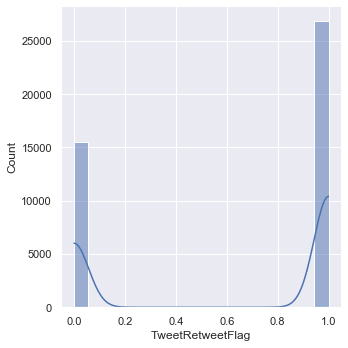

In [244]:
sns.displot(raw_data_mod_2["TweetRetweetFlag"],kde=True)

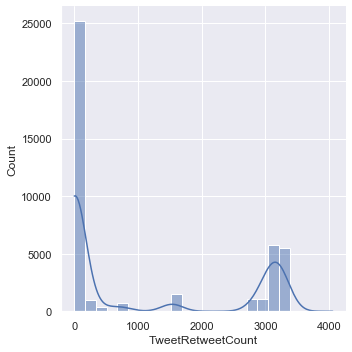

In [21]:
sns.displot(raw_data_mod_2["TweetRetweetCount"],kde=True)

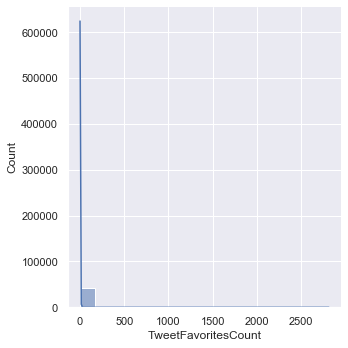

In [245]:
sns.displot(raw_data_mod_2["TweetFavoritesCount"],kde=True)

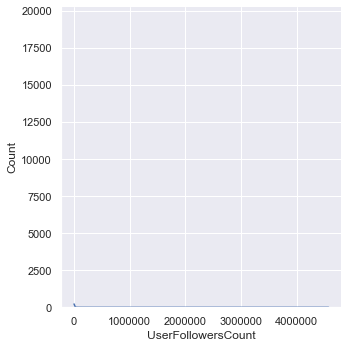

In [246]:
sns.displot(raw_data_mod_2["UserFollowersCount"],kde=True)

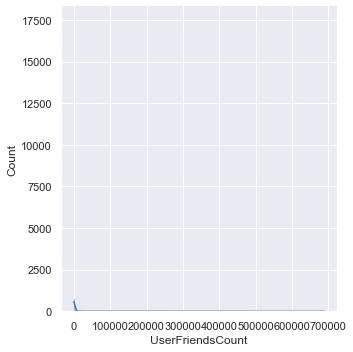

In [24]:
sns.displot(raw_data_mod_2["UserFriendsCount"],kde=True)

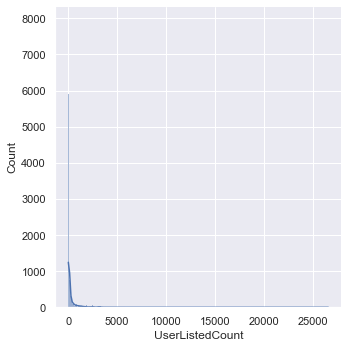

In [249]:
sns.displot(raw_data_mod_2["UserListedCount"],kde=True)

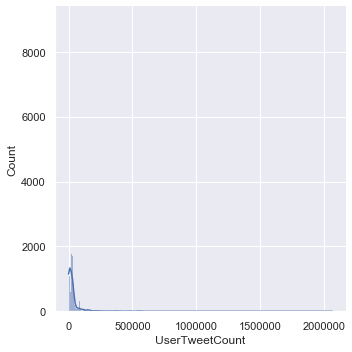

In [26]:
sns.displot(raw_data_mod_2["UserTweetCount"],kde=True)

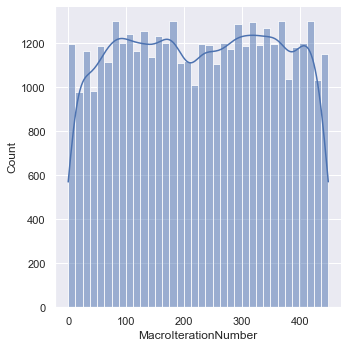

In [248]:
sns.displot(raw_data_mod_2["MacroIterationNumber"],kde=True)

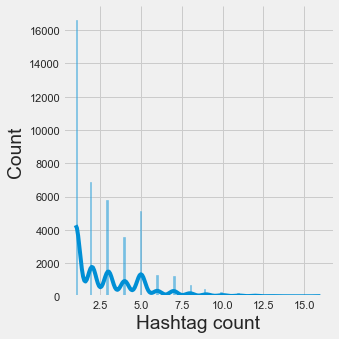

In [112]:

sns.displot(raw_data_mod_2["Hashtag count"],kde=True)

# Remove Outliers

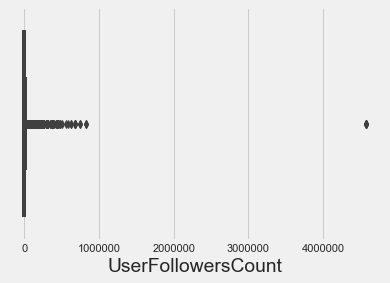

In [179]:
sns.boxplot(x="UserFollowersCount", data=raw_data_mod_2)

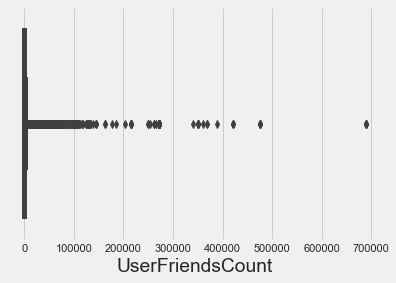

In [180]:
sns.boxplot(x="UserFriendsCount", data=raw_data_mod_2)

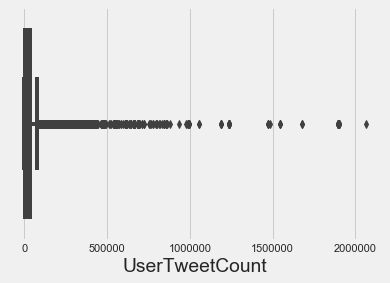

In [181]:
sns.boxplot(x="UserTweetCount", data=raw_data_mod_2)

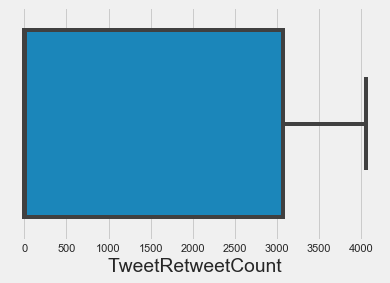

In [192]:
sns.boxplot(x="TweetRetweetCount", data=raw_data_mod_2)

In [250]:
# 2% of outliers are removed for 3 variables. In total 5 to 6% of  data is removed

q = raw_data_mod_2["UserFollowersCount"].quantile(0.98)
data_1 = raw_data_mod_2[raw_data_mod_2["UserFollowersCount"]<q]


q2 = data_1["UserFriendsCount"].quantile(0.98)
data_2 = data_1[data_1["UserFriendsCount"]<q2]


q3 = data_2["UserTweetCount"].quantile(0.98)
data_3 = data_2[data_2["UserTweetCount"]<q3]
data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39860 entries, 0 to 42367
Data columns (total 9 columns):
TweetRetweetFlag        39860 non-null int32
TweetRetweetCount       39860 non-null int64
TweetFavoritesCount     39860 non-null int64
UserFollowersCount      39860 non-null int64
UserFriendsCount        39860 non-null int64
UserListedCount         39860 non-null int64
UserTweetCount          39860 non-null int64
MacroIterationNumber    39860 non-null int64
Hashtag count           39860 non-null int64
dtypes: int32(1), int64(8)
memory usage: 2.9 MB


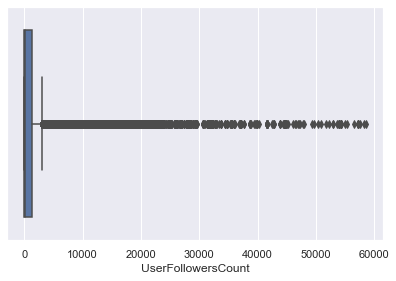

In [251]:
sns.boxplot(x="UserFollowersCount", data=data_3)

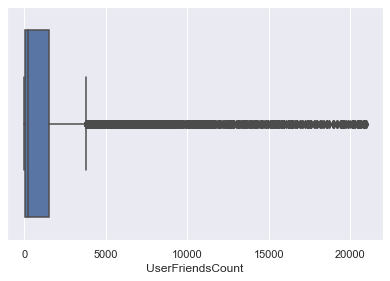

In [252]:
sns.boxplot(x="UserFriendsCount", data=data_3)

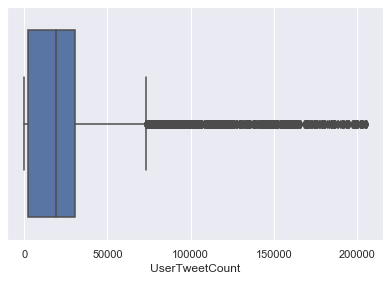

In [253]:
sns.boxplot(x="UserTweetCount", data=data_3)

# To verify the corelation between the target and explanatory variables

Text(0.5, 1.0, 'Hastag count and Retweet Count')

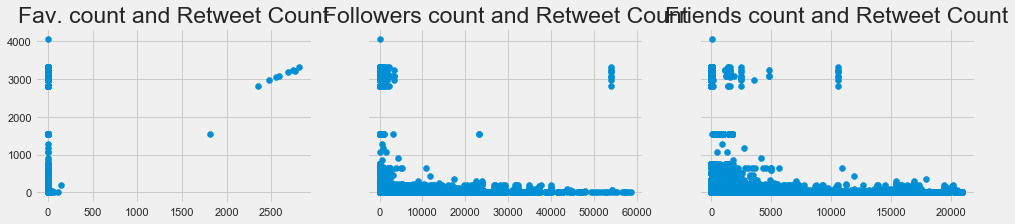

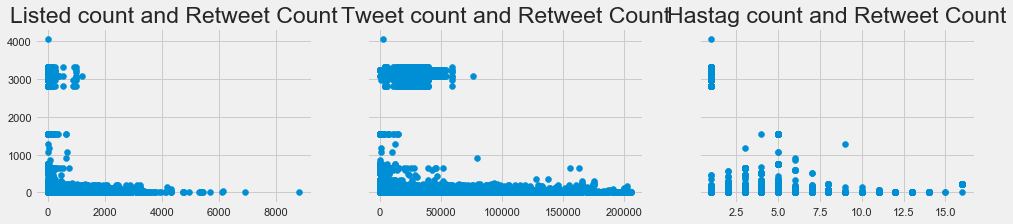

In [200]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) 
f, (ax4, ax5,ax6) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) 
ax1.scatter(data_3["TweetFavoritesCount"],data_3["TweetRetweetCount"])
ax1.set_title('Fav. count and Retweet Count')
ax2.scatter(data_3["UserFollowersCount"],data_3["TweetRetweetCount"])
ax2.set_title('Followers count and Retweet Count')
ax3.scatter(data_3["UserFriendsCount"],data_3["TweetRetweetCount"])
ax3.set_title('Friends count and Retweet Count')
ax4.scatter(data_3["UserListedCount"],data_3["TweetRetweetCount"])
ax4.set_title('Listed count and Retweet Count')
ax5.scatter(data_3["UserTweetCount"],data_3["TweetRetweetCount"])
ax5.set_title('Tweet count and Retweet Count')
ax6.scatter(data_3["Hashtag count"],data_3["TweetRetweetCount"])
ax6.set_title('Hastag count and Retweet Count')

# Linear Regression Model

# Declare the inputs and the targets

In [254]:
data_cleaned = data_3.reset_index(drop=True)

In [255]:
# The target(s) (dependent variable) is 'Retweet count'
Target = data_cleaned["TweetRetweetCount"]

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_cleaned.drop(["TweetRetweetCount"],axis=1)

# Scale the data

In [256]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [257]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

# Train Test Split

In [258]:
# Split the variables with an 80-20 split and some random state
# To have the same split, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, Target, test_size=0.2, random_state=365)

# Create the regression

# Sklearn LinearRegression

In [259]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [260]:
# Let's check the outputs of the regression

y_hat = reg.predict(x_train)

In [261]:
reg.score(x_train,y_train)

0.5902228307867012

In [262]:
reg.intercept_

1146.2853571981368

In [210]:
reg.coef_

array([ 618.93671312,   50.76661737,   -4.44279148, -286.33556968,
       -305.08284616,  215.09943582,  153.00179068, -501.91655347])

# Testing

In [263]:
y_hat_test = reg.predict(x_test)

In [265]:
np.sqrt(mean_squared_error(y_test,y_hat_test))

928.6345927567121

# XGBOOST Regression & Testing

In [266]:
import xgboost as xgb
regressor=xgb.XGBRegressor(eval_metric='rmse')
regressor.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eval_metric='rmse', gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=2,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [267]:
predictions = regressor.predict(x_test)

In [268]:
np.sqrt(mean_squared_error(y_test,predictions))

92.51456480600969

In [269]:
# compare the actual predictions and Target variable, residual and difference in %
df_pf_xgb = pd.DataFrame(predictions, columns=['Prediction'])
df_pf_xgb['Target'] = y_test
df_pf_xgb['Residual'] = df_pf_xgb['Target'] - df_pf_xgb['Prediction']
df_pf_xgb['Difference%'] = np.absolute(df_pf_xgb['Residual']/df_pf_xgb['Target']*100)
df_pf_xgb.sort_values(by=['Difference%'],ascending=True)

Prediction  Target     Residual   Difference%
2392  2973.000000    2973     0.000000  0.000000e+00
6913  3086.003418    3086    -0.003418  1.107573e-04
4871  3240.994141    3241     0.005859  1.807891e-04
7179  2831.008545    2831    -0.008545  3.018340e-04
7567  2831.008545    2831    -0.008545  3.018340e-04
5414  2831.008545    2831    -0.008545  3.018340e-04
455   2831.008545    2831    -0.008545  3.018340e-04
2060  2972.988525    2973     0.011475  3.859606e-04
6960  2972.988525    2973     0.011475  3.859606e-04
1939  3227.984619    3228     0.015381  4.764826e-04
1791  3085.983643    3086     0.016357  5.300526e-04
4686  1535.991333    1536     0.008667  5.642573e-04
6525  1535.991333    1536     0.008667  5.642573e-04
6649   742.995056     743     0.004944  6.653900e-04
446    742.995056     743     0.004944  6.653900e-04
300    742.995056     743     0.004944  6.653900e-04
3230  3228.022705    3228    -0.022705  7.033791e-04
7269  3180.028320    3180    -0.028320  8.905759e-04
1111  3085.968750    3086     0.031250  1.012638e-03
7648  3309.034668    3309    -0.034668  1.047687e-03
3037  3085.962891    3086     0.037109  1.202507e-03
5393  3085.962891    3086     0.037109  1.202507e-03
3613  3085.962891    3086     0.037109  1.202507e-03
1201  3085.962891    3086     0.037109  1.202507e-03
2290  3085.962891    3086     0.037109  1.202507e-03
6756  3085.962891    3086     0.037109  1.202507e-03
4588  3085.962891    3086     0.037109  1.202507e-03
2471  3085.962891    3086     0.037109  1.202507e-03
7789  3085.962891    3086     0.037109  1.202507e-03
5093  3085.962891    3086     0.037109  1.202507e-03
6394  3085.962891    3086     0.037109  1.202507e-03
3208  3085.962891    3086     0.037109  1.202507e-03
4779  3085.962891    3086     0.037109  1.202507e-03
2550  3085.962891    3086     0.037109  1.202507e-03
2479  3085.962891    3086     0.037109  1.202507e-03
6762  3085.962891    3086     0.037109  1.202507e-03
4772  3085.962891    3086     0.037109  1.202507e-03
1326  3085.962891    3086     0.037109  1.202507e-03
4176  3085.962891    3086     0.037109  1.202507e-03
3200  3085.962891    3086     0.037109  1.202507e-03
3246  3085.962891    3086     0.037109  1.202507e-03
5219  3085.962891    3086     0.037109  1.202507e-03
2833  3180.042969    3180    -0.042969  1.351219e-03
4875  3180.042969    3180    -0.042969  1.351219e-03
5204  3180.042969    3180    -0.042969  1.351219e-03
7015  3180.042969    3180    -0.042969  1.351219e-03
2976  3180.042969    3180    -0.042969  1.351219e-03
3978  3085.953369    3086     0.046631  1.511045e-03
42    3308.945801    3309     0.054199  1.637933e-03
4295  3043.051025    3043    -0.051025  1.676812e-03
2990  2973.059570    2973    -0.059570  2.003710e-03
4683  2972.938721    2973     0.061279  2.061194e-03
499   2972.938721    2973     0.061279  2.061194e-03
6145  3086.069336    3086    -0.069336  2.246790e-03
3058  3086.069336    3086    -0.069336  2.246790e-03
5177  3086.069336    3086    -0.069336  2.246790e-03
6059  3086.069336    3086    -0.069336  2.246790e-03
5178  3086.069336    3086    -0.069336  2.246790e-03
1147  3086.069336    3086    -0.069336  2.246790e-03
81    3086.069336    3086    -0.069336  2.246790e-03
1219  3086.069336    3086    -0.069336  2.246790e-03
6437  3180.073975    3180    -0.073975  2.326246e-03
5590  2830.933838    2831     0.066162  2.337058e-03
7158  3241.076904    3241    -0.076904  2.372857e-03
48    3086.075195    3086    -0.075195  2.436660e-03
6104  3086.075195    3086    -0.075195  2.436660e-03
3447  3308.916016    3309     0.083984  2.538059e-03
1905  3308.916016    3309     0.083984  2.538059e-03
3545  3308.916016    3309     0.083984  2.538059e-03
2051  3308.916016    3309     0.083984  2.538059e-03
7243  3043.078857    3043    -0.078857  2.591437e-03
4424  3043.080811    3043    -0.080811  2.655621e-03
6071  3228.087891    3228    -0.087891  2.722758e-03
4259  3228.087891    3228    -0.087891  2.722758e-03
3178  3309.091064    3309    -0.

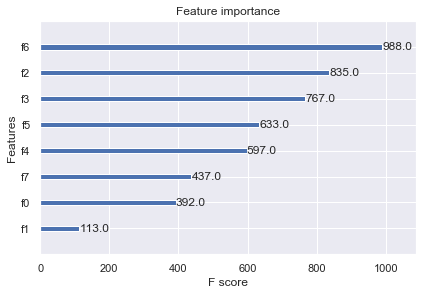

In [270]:
# Plot the important features
from xgboost import plot_importance
import matplotlib.pyplot as plt
plot_importance(regressor)
plt.show();

# Random Forest Regressor & Testing

In [272]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(max_depth=30, n_estimators=500)
forest_model.fit(x_train, y_train)
preds = forest_model.predict(x_test)
print("R2 score - training set :"+str(forest_model.score(x_train,y_train)))
print("R2 score -  test set :"+str(forest_model.score(x_test,y_test)))
print("RMSE from test set :"+str(np.sqrt(mean_squared_error(preds,y_test))))

R2 score - training set :0.9991706862247691
R2 score -  test set :0.9960839058219206
RMSE from test set :90.9700000747124


In [273]:
preds

array([3.24100000e+03, 6.25629971e-03, 3.24100000e+03, ...,
       2.69706000e+02, 4.72855052e-01, 6.44583093e-01])

In [275]:
# compare the actual predictions and Target variable, residual and difference in %
pd.options.display.max_rows = 9999
df_pf_fr = pd.DataFrame(preds, columns=['Prediction'])
df_pf_fr['Target'] = y_test
df_pf_fr['Residual'] = df_pf_fr['Target'] - df_pf_fr['Prediction']
df_pf_fr['Difference%'] = np.absolute((df_pf_fr['Residual'])/df_pf_fr['Target']*100)
df_pf_fr.sort_values(by=['Difference%'],ascending=True)

Prediction  Target     Residual   Difference%
0     3241.000000    3241     0.000000  0.000000e+00
6374  3309.000000    3309     0.000000  0.000000e+00
2931   743.000000     743     0.000000  0.000000e+00
2932  3241.000000    3241     0.000000  0.000000e+00
6373  1536.000000    1536     0.000000  0.000000e+00
2936  3241.000000    3241     0.000000  0.000000e+00
6371  1536.000000    1536     0.000000  0.000000e+00
2938  3086.000000    3086     0.000000  0.000000e+00
6368  3241.000000    3241     0.000000  0.000000e+00
6367  3241.000000    3241     0.000000  0.000000e+00
2944  3309.000000    3309     0.000000  0.000000e+00
2946  3241.000000    3241     0.000000  0.000000e+00
2921  3086.000000    3086     0.000000  0.000000e+00
6360  2831.000000    2831     0.000000  0.000000e+00
2955  3228.000000    3228     0.000000  0.000000e+00
2956  2973.000000    2973     0.000000  0.000000e+00
6350  3241.000000    3241     0.000000  0.000000e+00
2958  3241.000000    3241     0.000000  0.000000e+00
2959  3086.000000    3086     0.000000  0.000000e+00
2960  3241.000000    3241     0.000000  0.000000e+00
6348  3180.000000    3180     0.000000  0.000000e+00
2966  3086.000000    3086     0.000000  0.000000e+00
2967   502.000000     502     0.000000  0.000000e+00
2968  3241.000000    3241     0.000000  0.000000e+00
2969  3228.000000    3228     0.000000  0.000000e+00
6356  3241.000000    3241     0.000000  0.000000e+00
2918  3241.000000    3241     0.000000  0.000000e+00
6384  3043.000000    3043     0.000000  0.000000e+00
2910  3069.000000    3069     0.000000  0.000000e+00
2859  3241.000000    3241     0.000000  0.000000e+00
2863  2973.000000    2973     0.000000  0.000000e+00
6421  2973.000000    2973     0.000000  0.000000e+00
6420  1536.000000    1536     0.000000  0.000000e+00
6416  3241.000000    3241     0.000000  0.000000e+00
2871   502.000000     502     0.000000  0.000000e+00
6415  3309.000000    3309     0.000000  0.000000e+00
2875  3180.000000    3180     0.000000  0.000000e+00
6408  2973.000000    2973     0.000000  0.000000e+00
6405  1536.000000    1536     0.000000  0.000000e+00
6403  3309.000000    3309     0.000000  0.000000e+00
6402  3241.000000    3241     0.000000  0.000000e+00
2887  1536.000000    1536     0.000000  0.000000e+00
2888  1536.000000    1536     0.000000  0.000000e+00
6400  3069.000000    3069     0.000000  0.000000e+00
2892  3180.000000    3180     0.000000  0.000000e+00
2893  1536.000000    1536     0.000000  0.000000e+00
2894  2973.000000    2973     0.000000  0.000000e+00
6398  3069.000000    3069     0.000000  0.000000e+00
6397  1536.000000    1536     0.000000  0.000000e+00
6394  3086.000000    3086     0.000000  0.000000e+00
2903   743.000000     743     0.000000  0.000000e+00
6388  3069.000000    3069     0.000000  0.000000e+00
2908  3086.000000    3086     0.000000  0.000000e+00
2909  3241.000000    3241     0.000000  0.000000e+00
2971  2973.000000    2973     0.000000  0.000000e+00
2972  3309.000000    3309     0.000000  0.000000e+00
2974  3241.000000    3241     0.000000  0.000000e+00
2975  2831.000000    2831     0.000000  0.000000e+00
6310  2973.000000    2973     0.000000  0.000000e+00
6309  3241.000000    3241     0.000000  0.000000e+00
3037  3086.000000    3086     0.000000  0.000000e+00
6307  3309.000000    3309     0.000000  0.000000e+00
6306  3069.000000    3069     0.000000  0.000000e+00
6305   502.000000     502     0.000000  0.000000e+00
3046  3069.000000    3069     0.000000  0.000000e+00
3048  1536.000000    1536     0.000000  0.000000e+00
3051  3309.000000    3309     0.000000  0.000000e+00
3052  3241.000000    3241     0.000000  0.000000e+00
3054  3241.000000    3241     0.000000  0.000000e+00
6303  3086.000000    3086     0.000000  0.000000e+00
3057  3241.000000    3241     0.000000  0.000000e+00
3058  3086.000000    3086     0.000000  0.000000e+00
6302  3086.000000    3086     0.000000  0.000000e+00
3060  2831.000000    2831     0.000000  0.000000e+00
6301  3180.000000    3180     0.

In [276]:
df_pf_fr.describe()

Prediction       Target     Residual  Difference%
count  7972.000000  7972.000000  7972.000000  7883.000000
mean   1149.792317  1147.286879    -2.505438          inf
std    1450.123312  1453.780609    90.941196          NaN
min       0.000000     0.000000 -3195.206000     0.000000
25%       0.177169     0.000000    -0.231563     0.000000
50%      44.367424    22.000000     0.000000    43.655571
75%    3069.036000  3086.000000     0.000000          inf
max    3309.000000  3309.000000  2348.594600          inf

# Scatter Plot Actuals Vs Prediction - Random Forest Regression 

Text(0, 0.5, 'Predictions (y_hat)')

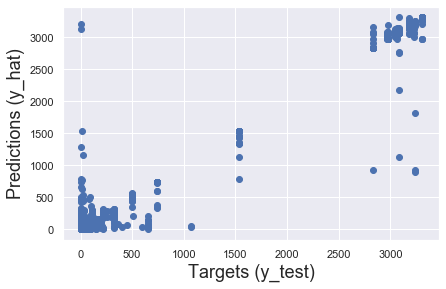

In [277]:
plt.scatter(y_test, preds)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)

# Residual Plot Actuals Vs Prediction - Random Forest Regression 

C:\Users\balasubramaniame\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

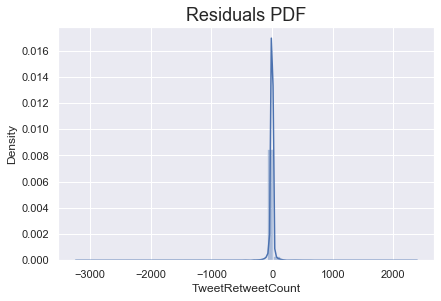

In [278]:
sns.distplot(y_test - preds)
plt.title("Residuals PDF", size=18)

In [15]:
import xgboost
print(xgboost.__version__)

1.5.0
